In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [65]:
#load and read data
agrodata = pd.read_excel('Copy of Logistics Role Test Data.xlsx')
agrodata.head()

,Agrodealer_id,Date,Agrodealer Referrals,County,Ward
0,473,2021-03-08,0,Siaya,Ukwala
1,473,2021-03-09,0,Siaya,Ukwala
2,473,2021-03-10,0,Siaya,Ukwala
3,473,2021-03-11,1,Siaya,Ukwala
4,473,2021-03-12,0,Siaya,Ukwala


In [66]:
#set Date as index
agrodata.set_index('Date', inplace = True)
agrodata.head()

,Agrodealer_id,Agrodealer Referrals,County,Ward
Date,,,,
2021-03-08,473,0,Siaya,Ukwala
2021-03-09,473,0,Siaya,Ukwala
2021-03-10,473,0,Siaya,Ukwala
2021-03-11,473,1,Siaya,Ukwala
2021-03-12,473,0,Siaya,Ukwala


# QUESTION 1: TOP 10 DEALERS

In [67]:
# Aggregate the data using aggrodealer_id and sum the referrals
top_10_dealers = agrodata.groupby('Agrodealer_id')['Agrodealer Referrals'].sum().reset_index()
top_10_dealers.set_index('Agrodealer_id', inplace = False)
top_10_dealers.head(10)

,Agrodealer_id,Agrodealer Referrals
0,473,89
1,488,145
2,503,167
3,518,205
4,533,81
5,548,146
6,563,148
7,578,201
8,593,81
9,608,140


In [68]:
#Arrange the data to get the top 10 dealers
top_10_dealers_sorted = top_10_dealers.sort_values(by='Agrodealer Referrals', ascending = False)
A = top_10_dealers_sorted.head(10)
A

,Agrodealer_id,Agrodealer Referrals
15,698,267
19,758,253
11,638,231
3,518,205
7,578,201
10,623,174
2,503,167
13,668,164
14,683,164
17,728,155


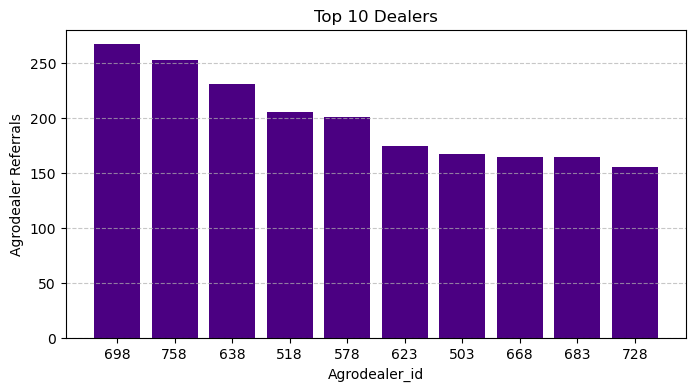

In [104]:
#Plot a bar graph for the top 10 dealers
A['Agrodealer_id'] = A['Agrodealer_id'].astype(str)
plt.figure(figsize = (8, 4))
plt.bar(A['Agrodealer_id'], A['Agrodealer Referrals'], color='indigo')

plt.xlabel('Agrodealer_id')
plt.ylabel('Agrodealer Referrals')
plt.title('Top 10 Dealers')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show() 

In [70]:
print(agrodata.columns)

Index(['Agrodealer_id', 'Agrodealer Referrals', 'County', 'Ward'], dtype='object')


In [71]:
print(agrodata.index)

DatetimeIndex(['2021-03-08', '2021-03-09', '2021-03-10', '2021-03-11',
               '2021-03-12', '2021-03-13', '2021-03-14', '2021-03-15',
               '2021-03-16', '2021-03-17',
               ...
               '2021-06-04', '2021-06-05', '2021-06-06', '2021-06-07',
               '2021-06-08', '2021-06-09', '2021-06-10', '2021-06-11',
               '2021-06-12', '2021-06-13'],
              dtype='datetime64[ns]', name='Date', length=2058, freq=None)


In [72]:
agrodata.reset_index(inplace=True)
agrodata.head()

,Date,Agrodealer_id,Agrodealer Referrals,County,Ward
0,2021-03-08,473,0,Siaya,Ukwala
1,2021-03-09,473,0,Siaya,Ukwala
2,2021-03-10,473,0,Siaya,Ukwala
3,2021-03-11,473,1,Siaya,Ukwala
4,2021-03-12,473,0,Siaya,Ukwala


# QUESTION 2: BEST WEEKS FOR REFERRALS

In [73]:
#convert the days to weeks and add months
agrodata['Date'] = pd.to_datetime(agrodata['Date'])
agrodata['Month'] = pd.to_datetime(agrodata['Date']).dt.month_name()
agrodata['Week'] = agrodata['Date'].dt.isocalendar().week
agrodata.head()

,Date,Agrodealer_id,Agrodealer Referrals,County,Ward,Month,Week
0,2021-03-08,473,0,Siaya,Ukwala,March,10
1,2021-03-09,473,0,Siaya,Ukwala,March,10
2,2021-03-10,473,0,Siaya,Ukwala,March,10
3,2021-03-11,473,1,Siaya,Ukwala,March,10
4,2021-03-12,473,0,Siaya,Ukwala,March,10


In [75]:
#Aggregate data using weeks and sort values from largest (question2)
best_weeks = agrodata.groupby(['Week']).agg({'Month': 'first', 'Agrodealer Referrals': 'sum'}).reset_index()
best_weeks_sorted = best_weeks.sort_values(by = 'Agrodealer Referrals', ascending = False)
best_weeks_sorted.head(10)

,Week,Month,Agrodealer Referrals
7,17,April,422
6,16,April,381
8,18,May,379
5,15,April,300
4,14,April,282
9,19,May,276
10,20,May,275
3,13,March,220
11,21,May,190
2,12,March,167


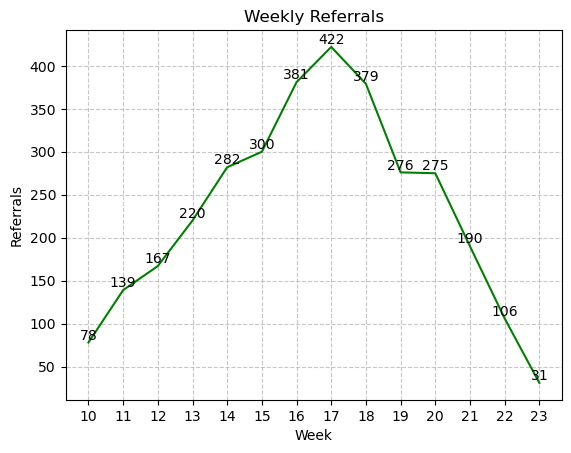

In [100]:
best_weeks_sorted['Week'] = best_weeks_sorted['Week'].astype(str)
B = best_weeks_sorted.sort_values(by='Week', ascending=True)

sns.lineplot(x='Week', y='Agrodealer Referrals', data=B, color='green')
plt.xlabel('Week')
plt.ylabel('Referrals')
plt.title('Weekly Referrals')

plt.grid(True, linestyle='--', alpha=0.7)

for index, row in B.iterrows():
    plt.text(row['Week'], row['Agrodealer Referrals'], str(row['Agrodealer Referrals']), ha='center', va='bottom')

plt.show()

# QUESTION 3: BEST DAY OF THE WEEK

In [42]:
agrodata['Day'] = pd.to_datetime(agrodata['Date']).dt.day_name()
agrodata.head()

,Date,Agrodealer_id,Agrodealer Referrals,County,Ward,Month,Week,Day
0,2021-03-08,473,0,Siaya,Ukwala,March,10,Monday
1,2021-03-09,473,0,Siaya,Ukwala,March,10,Tuesday
2,2021-03-10,473,0,Siaya,Ukwala,March,10,Wednesday
3,2021-03-11,473,1,Siaya,Ukwala,March,10,Thursday
4,2021-03-12,473,0,Siaya,Ukwala,March,10,Friday


In [15]:
#The best day for referrals (question3)
best_day = agrodata.groupby(['Date', 'Day'])['Agrodealer Referrals'].sum().reset_index()
best_day_sorted = best_day.sort_values(by=['Agrodealer Referrals'], ascending=[False])
best_day_sorted.iloc[0]

Date                    2021-04-30 00:00:00
Day                                  Friday
Agrodealer Referrals                     87
Name: 53, dtype: object

# QUESTION 4: TOP AGENTS CONSISTENT BY WEEK AND BY DAY

In [16]:
agrodata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  2058 non-null   datetime64[ns]
 1   Agrodealer_id         2058 non-null   int64         
 2   Agrodealer Referrals  2058 non-null   int64         
 3   County                2058 non-null   object        
 4   Ward                  2058 non-null   object        
 5   Month                 2058 non-null   object        
 6   Week                  2058 non-null   UInt32        
 7   Day                   2058 non-null   object        
dtypes: UInt32(1), datetime64[ns](1), int64(2), object(4)
memory usage: 122.7+ KB


In [17]:
#removing values that are equal to 0
filtered_df = agrodata[agrodata['Agrodealer Referrals'] != 0]
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1392 entries, 3 to 2047
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  1392 non-null   datetime64[ns]
 1   Agrodealer_id         1392 non-null   int64         
 2   Agrodealer Referrals  1392 non-null   int64         
 3   County                1392 non-null   object        
 4   Ward                  1392 non-null   object        
 5   Month                 1392 non-null   object        
 6   Week                  1392 non-null   UInt32        
 7   Day                   1392 non-null   object        
dtypes: UInt32(1), datetime64[ns](1), int64(2), object(4)
memory usage: 93.8+ KB


In [60]:
#counting weeks worked per dealer
week_counts_per_agrodealer = filtered_df.groupby('Agrodealer_id')['Week'].nunique().reset_index(name='Weeks_Worked')
top_10_weekly = week_counts_per_agrodealer.sort_values(by='Weeks_Worked', ascending=False)
print(top_10_weekly.head(10))


    Agrodealer_id  Weeks_Worked
10            623            14
2             503            14
3             518            14
19            758            14
5             548            14
6             563            14
7             578            14
18            743            14
9             608            14
1             488            14


In [61]:
#counting days worked per dealer
agrodealer_counts = filtered_df.groupby('Agrodealer_id')['Agrodealer Referrals'].size().reset_index(name='Days_Worked')
top_10_daily = agrodealer_counts.sort_values(by='Days_Worked', ascending=False)
print(top_10_daily.head(10))

    Agrodealer_id  Days_Worked
19            758           80
15            698           80
11            638           75
7             578           74
10            623           72
13            668           72
14            683           72
2             503           71
5             548           71
1             488           69


In [106]:
#merge the weeks worked with the days worked
merged_df = top_10_daily.merge(top_10_weekly, on='Agrodealer_id', how='outer')
print(merged_df.head(10))

   Agrodealer_id  Days_Worked  Weeks_Worked
0            758           80            14
1            698           80            14
2            638           75            14
3            578           74            14
4            623           72            14
5            668           72            14
6            683           72            14
7            503           71            14
8            548           71            14
9            488           69            14


<Figure size 1200x600 with 0 Axes>

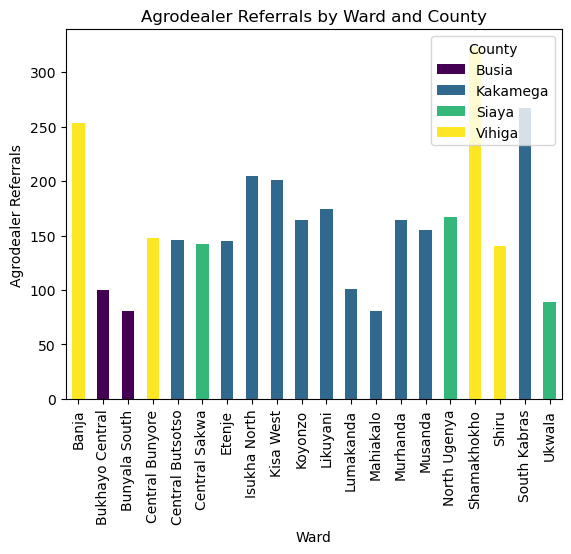

In [107]:
plt.figure(figsize=(12, 6))

regional_data = agrodata.pivot_table(index='Ward', columns='County', values='Agrodealer Referrals', aggfunc='sum', fill_value=0)

regional_data.plot(kind='bar', stacked=True, colormap='viridis')


plt.xlabel('Ward')
plt.ylabel('Agrodealer Referrals')
plt.title('Agrodealer Referrals by Ward and County')
plt.legend(title='County', loc='upper right')

plt.show()